# Assignment 3: Unsupervised Learning + NLP (Bonus)

Fill in the TODO sections and write short theory answers where asked.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram, linkage




## Load Dataset

In [ ]:

# TODO: Load the Spotify dataset (or dataset used in Assignment 2)
df = pd.read_csv("/content/dataset.csv")
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Question 1: Data Preparation

**Q** - Why is feature scaling important in clustering?

In [ ]:

features = ["danceability", "energy", "loudness", "tempo", "valence"]

# TODO: Select features
X = df[features]

# TODO: Handle missing values
X = X.dropna()

In [ ]:

scaler = StandardScaler()
# TODO: Scale features
X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=features)
X_scaled.head()
X_small = X_scaled[:1000]


## Question 2: Hierarchical Clustering

**Q:** What does a dendrogram show?

Ans : A dendrogram shows how data points are merged into clusters at different distance levels.
It visualizes the hierarchical structure of clusters and helps decide the optimal number of clusters by cutting the tree at a chosen height.


In [ ]:

# TODO: Perform linkage
linked = linkage(X_small, method="ward")


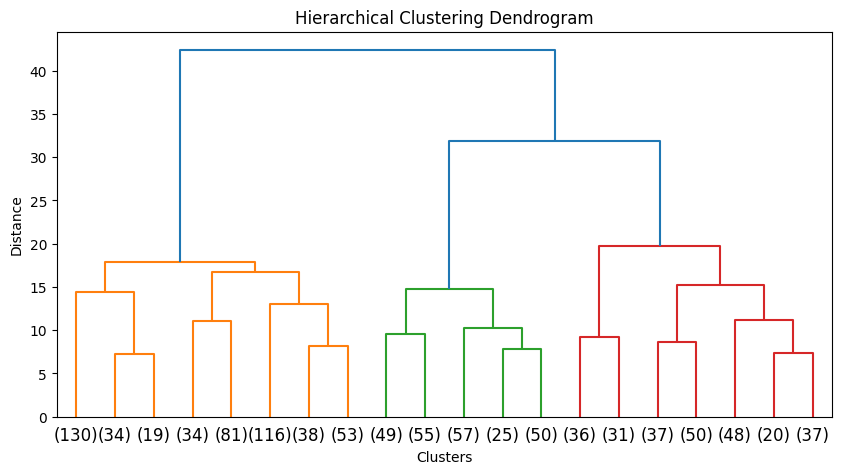

In [ ]:

plt.figure(figsize=(10,5))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Clusters")
plt.ylabel("Distance")
plt.show()


In [ ]:

# TODO: Choose number of clusters
X_small = X_scaled[:1000]
df_small = df.iloc[:1000].copy()

hc = AgglomerativeClustering(n_clusters=3)
df_small["HC_cluster"] = hc.fit_predict(X_small)

df_small.head()



,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,HC_cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,2
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


## Question 3: K-Means Clustering

**Q:** Why does K-Means need K?

Ans : K-Means requires K because it must know how many clusters to form in advance.
The algorithm minimizes intra-cluster variance for exactly K groups, so the number of clusters is a user-defined parameter.

In [ ]:

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


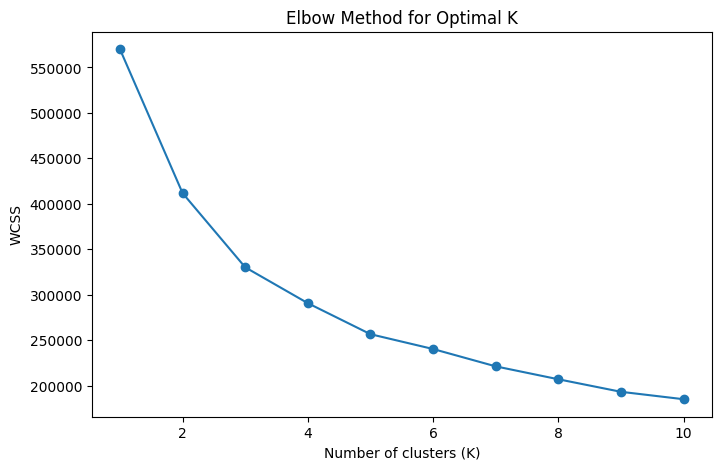

In [ ]:

#plt.plot(range(1,11), wcss, marker='o')
#plt.show()
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K")
plt.show()


In [ ]:

# TODO: Choose optimal K
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

# Create a Series with the cluster labels, using the index from the 'X' DataFrame
# This ensures correct alignment with the original 'df'
cluster_series = pd.Series(cluster_labels, index=X.index)

# Assign these cluster labels to the original 'df' DataFrame
# Rows in df that were dropped during X.dropna() will get NaN for 'KMeans_Cluster'
df["KMeans_Cluster"] = cluster_series
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,KMeans_Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,2


## Question 4: PCA Visualization

In [ ]:

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca, columns=["PC1","PC2"])
print(df.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'KMeans_Cluster'],
      dtype='object')


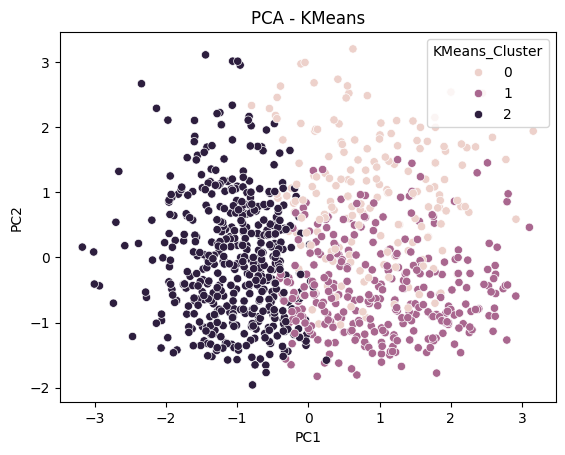

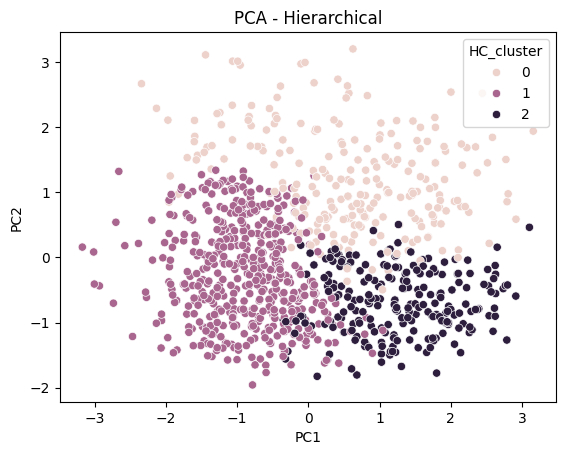

In [ ]:
X_vis = X_scaled[:1000]

labels_kmeans = df["KMeans_Cluster"].iloc[:1000]
labels_hc = df_small["HC_cluster"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)
X_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])

sns.scatterplot(x=X_pca["PC1"], y=X_pca["PC2"], hue=labels_kmeans)
plt.title("PCA - KMeans")
plt.show()

sns.scatterplot(x=X_pca["PC1"], y=X_pca["PC2"], hue=labels_hc)
plt.title("PCA - Hierarchical")
plt.show()

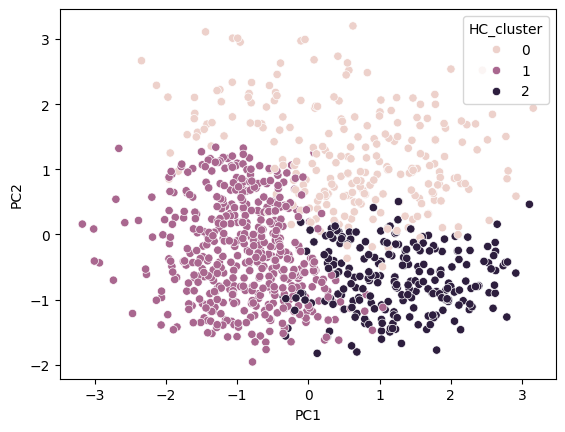

In [ ]:

sns.scatterplot(x=X_pca["PC1"], y=X_pca["PC2"], hue=labels_hc)
plt.show()



## Question 5: Gaussian Mixture Models

**Q:** Difference between K-Means and GMM?

In [ ]:

# TODO: Initialize and fit GMM
gmm = GaussianMixture(n_components=optimal_k, random_state=42)

# Get GMM cluster predictions
gmm_cluster_labels = gmm.fit_predict(X_scaled)

# Create a Series with the cluster labels, using the index from the 'X' DataFrame
# This ensures correct alignment with the original 'df'
gmm_cluster_series = pd.Series(gmm_cluster_labels, index=X.index)

# Assign these cluster labels to the original 'df' DataFrame
df["GMM_Cluster"] = gmm_cluster_series
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,KMeans_Cluster,GMM_Cluster
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,1,1
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2,2
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,2,1
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,2,2
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,2,1


In [ ]:

# TODO: Show soft cluster probabilities
gmm_probs = gmm.predict_proba(X_scaled)
gmm_probs[:5]


array([[1.76716146e-03, 9.97994588e-01, 2.38250415e-04],
       [1.97211022e-16, 7.37157312e-02, 9.26284269e-01],
       [1.20662196e-07, 7.24144847e-01, 2.75855033e-01],
       [4.07763169e-21, 1.65649598e-03, 9.98343504e-01],
       [8.97036477e-05, 9.59359142e-01, 4.05511539e-02]])

## BONUS: NLP

In [ ]:

text = "Machine learning enables systems to learn from data."
# TODO: Tokenization, stemming, lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Added to fix the LookupError

text = "Machine learning enables systems to learn from data."

# Tokenization
tokens = word_tokenize(text)

# Stemming
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]

# Lemmatization
lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]

print("Tokens:", tokens)
print("Stems:", stems)
print("Lemmas:", lemmas)


Tokens: ['Machine', 'learning', 'enables', 'systems', 'to', 'learn', 'from', 'data', '.']
Stems: ['machin', 'learn', 'enabl', 'system', 'to', 'learn', 'from', 'data', '.']
Lemmas: ['Machine', 'learning', 'enables', 'system', 'to', 'learn', 'from', 'data', '.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

sentences = [
    "Machine learning is powerful",
    "Unsupervised learning finds patterns",
    "Clustering groups similar data"
]

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(sentences)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("Bag of Words Matrix:\n", X_bow.toarray())



# TODO: Apply Bag of Words or TF-IDF


Vocabulary: ['clustering' 'data' 'finds' 'groups' 'is' 'learning' 'machine' 'patterns'
 'powerful' 'similar' 'unsupervised']
Bag of Words Matrix:
 [[0 0 0 0 1 1 1 0 1 0 0]
 [0 0 1 0 0 1 0 1 0 0 1]
 [1 1 0 1 0 0 0 0 0 1 0]]
